## 1. $k$-neares neighbor model 학습

nearest neighbor 방식을 이용해서 분류 문제를 해결하려고 한다. 사용하는 데이터는 감마선 망원경으로 관측될 결과를 바탕으로 고에너지 감마선을 검출하는 것이 목적이다. 이 데이터는 총 11개의 변수로 구성되어 있고 이준 10개는 설명 변수이고 마지막 ‘class’ 변수가 종속 변수이다. 

1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background)

데이터는 학습용 데이터와 검증용 데이터로 나누어서 사용하려고 하는데 이 부분의 코드를 수정하지 말고 그대로 사용한다. 학습용 데이터는 (trnX, trnY)이고 검증용 데이터는 (valX,valY)이다. 

In [107]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# data load
magic=pd.read_csv('https://drive.google.com/uc?export=download&id=1wtPT8o69Dq9W-yG61jPwlZFF3VvnZbxb', sep='\t')

X=magic[magic.columns[:-1]].values
y=magic['class'].values

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=10, stratify=y)

(1) k-NN 방식으로 예측을 하려고 한다. 이 때 가장 적절한 k를 결정하기 위해서 학습용 데이터로 검증용 데이터를 예측하고 검증용 데이터에서의 정확도를 비교해보고자 한다. k는 1, 5, 9, 13, 17로 바꿔보면서 테스트 해본다고 했을 때 검증용 데이터에서의 정확도를 각각의 경우에 대해서 구하시오.

In [108]:
knn = KNeighborsClassifier()

for d in [1, 5, 9, 13, 17]:
    knn.n_neighbors = d
    knn.fit(trnX, trnY)
    print("{:2d}: {}".format(d, knn.score(valX, valY)))
    

 1: 0.7810199789695058
 5: 0.8017875920084122
 9: 0.8138801261829653
13: 0.8165089379600421
17: 0.814143007360673


(2) 검증용 데이터 중에서 첫 번째 샘플의 20개의 neighbor를 해당 샘플과 함께 산포도로 그리시오. 이 때 사용하는 변수는 x축은 fLenght, y축은 fConc로 하고 가장 가까운 10개와 나머지 10개에 대해서는 구분이 되도록 하시오(색이나 마커로). 또한, y축의 경우에는 (-5, 5)까지를 표시하시오. 

참고: https://matplotlib.org/examples/pylab_examples/scatter_star_poly.html
         https://matplotlib.org/examples/pylab_examples/step_demo.html 

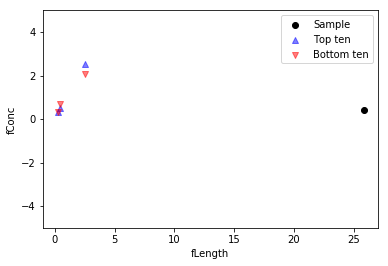

In [109]:
knn.n_neighbors = 20
knn.fit(trnX, trnY)
nn = knn.kneighbors(valX)


ind = nn[1][0]
tmp = trnX[ind]
point = valX[0][:]
plt.scatter([point[0]], [point[3]], marker='o', c='black')

x = tmp[:10][0]
y = tmp[:10][3]
plt.scatter(x, y, marker='^', c='blue', alpha=0.5)
x = tmp[10:][0]
y = tmp[10:][3]
plt.scatter(x, y, marker='v', c='red', alpha=0.5)
plt.xlabel('fLength')
plt.ylabel('fConc')
plt.ylim(-5, 5)
plt.xlim(-1, 27)
plt.legend(('Sample', 'Top ten', 'Bottom ten'))

plt.show()


(3) 이번에는 같은 데이터를 이용해서 예측을 진행하는데 그 전에 전체 데이터에 대해서 개별 변수를 표준화하고자 한다. 개별 변수를 평균은 0, 분산이 1이 되게끔 표준화하는 함수를 작성하고 이를 이용해서 전체 데이터를 표준화한 다음에 (1)에서 사용한 것과 동일하게 학습용 데이터와 검증용 데이터로 분할한 다음(X자리에 표준화한 데이터를 넣을 것)에 서로 다른 k=[1, 5, 9, 13, 17]에 대한 검증용 데이터에 대한 정확도를 계산하시오. 

In [113]:

def single_scaling(X):
    X_mean = X.mean()
    X_std = X.std()
    for i in range(len(X)):
        X[i] = (X[i] - X_mean) / (X_std)
    return X

def scaling(X):
    row, col = X.shape
    for i in range(col):
        icol = X[:, i]
        icol = single_scaling(icol)
        X[:, i] = icol
    return X

X=magic[magic.columns[:-1]].values
y=magic['class'].values
X = scaling(X)

trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=10, stratify=y)
knn = KNeighborsClassifier()
for d in [1, 5, 9, 13, 17]:
    knn.n_neighbors = d
    knn.fit(trnX, trnY)
    print("{:2d}: {}".format(d, knn.score(valX, valY)))
    



 1: 0.8217665615141956
 5: 0.8443743427970557
 9: 0.8404311251314406
13: 0.8393796004206099
17: 0.8412197686645636


(4) 표준화한 데이터를 이용해서 (2)에 지시한 사항을 동일하게 반복한 산포도를 그리시오. 단 이때는 x축의 범위는 (-1.2, 1.2), y축의 범위는 (-0.3, 2.2)로 해서 그리시오. 그리고 (2)의 결과와 어떤 차이가 있는지 설명하시오. 

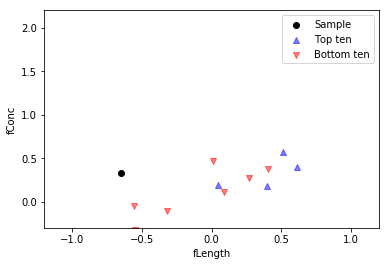

In [103]:
knn.n_neighbors = 20
knn.fit(trnX, trnY)
nn = knn.kneighbors(valX)


ind = nn[1][0]
tmp = trnX[ind]
point = valX[0][:]
plt.scatter([point[0]], [point[3]], marker='o', c='black')

x = tmp[:10][0]
y = tmp[:10][3]
plt.scatter(x, y, marker='^', c='blue', alpha=0.5)
x = tmp[10:][0]
y = tmp[10:][3]
plt.scatter(x, y, marker='v', c='red', alpha=0.5)
plt.xlabel('fLength')
plt.ylabel('fConc')
plt.ylim(-0.3, 2.2)
plt.xlim(-1.2, 1.2)
plt.legend(('Sample', 'Top ten', 'Bottom ten'))

plt.show()


## 2. Decision tree
와인에 포함된 다양한 물질의 조성으로부터 와인의 품질을 판단하는 모델을 decision tree를 이용해서 만들고자 한다. 사용하는 데이터는 white wine과 red wine으로 구분되어 있고 포함하고 있는 변수는 동일하다. 
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol 
12. quality (score between 0 and 10) 

1부터 11까지의 변수는 설명 변수이고 12는 종속 변수이다. 이 때 종속 변수 값이 6보다 크면 좋은 와인, 6 이하이면 좋지 않은 와인을 구분하는 모델을 학습한다. 

In [79]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn import metrics
%matplotlib inline
white=pd.read_csv('https://drive.google.com/uc?export=download&id=1NccSPU2EM5d1GGfhinKa9eQcd6wKbVNM', sep=';')
red=pd.read_csv('https://drive.google.com/uc?export=download&id=1lfeFPAh3m4TSBgM9AA50qtx4gb1ak0lJ', sep=';')

(1) max_depth=3, min_samples_split=100, min_samples_leaf=50로 설정하고 white wine에 대한 decision tree를 학습하고 정확도, recall, precision을 구하시오. 

In [62]:
X_white = white[white.columns[:-1]].values
y_white = white['quality'].values
row, col = X_white.shape
for i in range(row):
    if y_white[i] <= 6:
        y_white[i] = 0
    elif y_white[i] > 6:
        y_white[i] = 1
    
        
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, random_state=10, stratify=y_white)

white_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=100, min_samples_leaf=50)
white_clf.fit(X_train, y_train)
y_pred = white_clf.predict(X_test)
        
test_score = metrics.accuracy_score(y_test, y_pred)
        
test_score = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)

print("정확도: {}".format(test_score))
print("recall: {}\nprecision: {}".format(recall, precision))






정확도: 0.885
recall: 0.3148148148148148
precision: 0.6538461538461539


(2) 위에서 학습된 tree를 그리시오. 

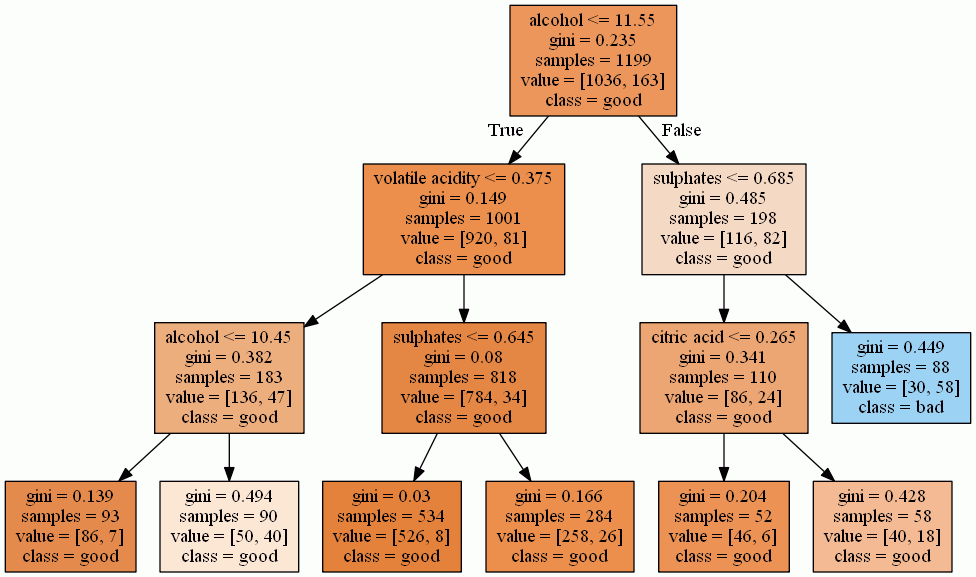

In [63]:
dot_data = StringIO()
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

export_graphviz(white_clf, out_file=dot_data, feature_names=feature_names, class_names=['good', 'bad'], filled=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_gif())

(3) max_depth=3, min_samples_split=50, min_samples_leaf=25로 설정하고 red wine에 대한 decision tree를 학습하고 정확도, recall, precision을 구하시오.

In [64]:
X_red = red[red.columns[:-1]].values
y_red = red['quality'].values
row, col = X_red.shape
for i in range(row):
    if y_red[i] <= 6:
        y_red[i] = 0
    elif y_red[i] > 6:
        y_red[i] = 1
    
        
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, random_state=10, stratify=y_red)

red_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=100, min_samples_leaf=50)
red_clf.fit(X_train, y_train)
y_pred = red_clf.predict(X_test)


        
test_score = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)

print("정확도: {}".format(test_score))
print("recall: {}\nprecision: {}".format(recall, precision))



정확도: 0.803265306122449
recall: 0.16226415094339622
precision: 0.6935483870967742


(4) 위에서 학습된 tree를 그리시오. 

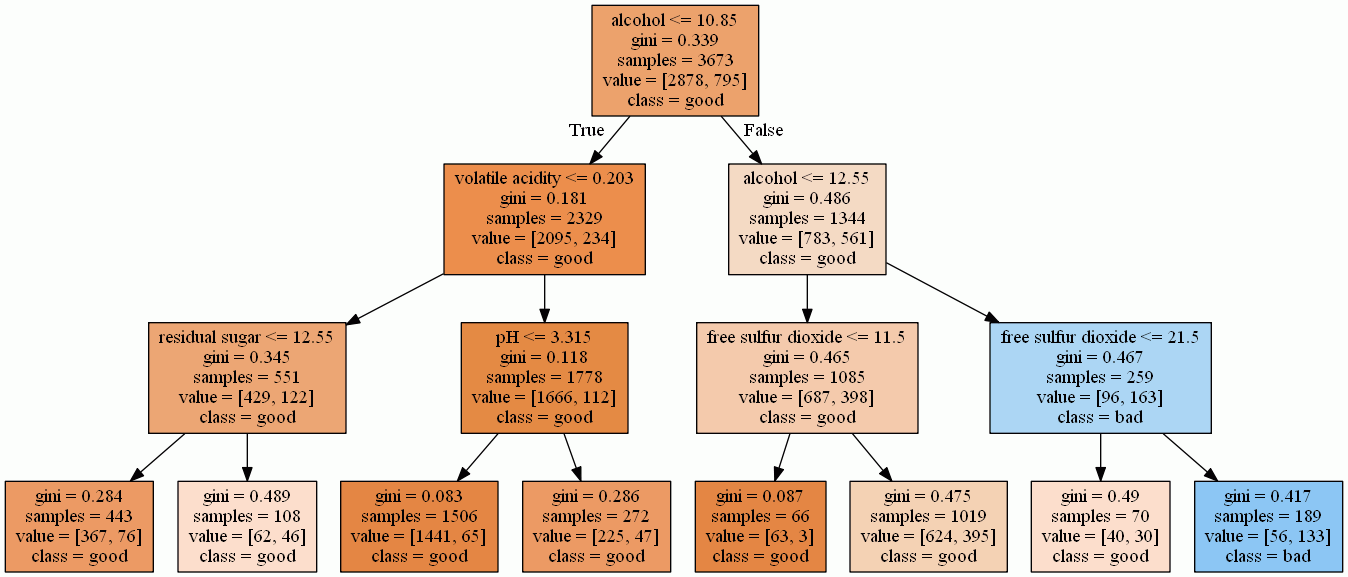

In [66]:
dot_data = StringIO()
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

export_graphviz(red_clf, out_file=dot_data, feature_names=feature_names, class_names=['good', 'bad'], filled=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_gif())
    


## 3. Naïve Bayes

Naïve Bayes 모형을 이용해서 스팸 SMS를 판별하는 모형을 만들고자 한다. 제공되는 spam_sms.csv 파일은 각 SMS에 특정 단어가 등장한 빈도와 최종 output 값을 포함하고 있다. 최종 target을 ‘target’이라는 이름으로 되어 있고 여기서 스팸인 경우 1, 스팸이 아닌 경우 0이라고 되어 있다. target 앞 쪽의 모든 변수는 특정 단어를 의미한다. 

In [67]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

sms=pd.read_csv('https://drive.google.com/uc?export=download&id=1hxjadaM9uKtcQW42SP4aTkKSgJvgDZEj')

(1) 먼저 주어진 데이터를 불러와 input에 해당하는 X와 output 값만 담고 있는 y 변수를 생성하고 k-NN에서 사용한 train_test_split과 동일한 설정으로 학습용 데이터와 검증용 데이터로 나누고자 한다. 나눈 이후에 학습용 데이터의 상위 5개 데이터를 Jupyter notebook 화면에 출력하시오. 

In [68]:
X = sms[sms.columns[:-1]].values
y = sms['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)
print("상위 5개 데이터")
print(X_train[0:5])
print("상위 5개 target")
print(y_train[0:5])


상위 5개 데이터
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

(2) Multinomial naïve Bayes 모형을 이용해서 세팅이 변경없이 학습용 데이터로 학습을 하고 검증용 데이터를 이용해서 정확도(accuracy), recall, precision, f1 measure 값을 구하시오.  

In [69]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

test_score = metrics.accuracy_score(y_test, y_pred)

recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
f1_measure = metrics.f1_score(y_test, y_pred)


print("정확도: {}".format(test_score))
print("recall: {}\nprecision: {}\nf1_measure: {}".format(recall, precision, f1_measure))


정확도: 0.9657534246575342
recall: 0.8716216216216216
precision: 0.8896551724137931
f1_measure: 0.8805460750853241


(3) 학습된 Multinomial naïve Bayes 모형으로부터 서로 다른 두 group(스팸 SMS와 스팸이 아닌 SMS)에서 확률이 높은 단어 상위 10개씩을 찾으시오. 

참고: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html 

In [70]:
#단어리스트 생성
word = sms.columns[:-1]
#확률 계산
probs = np.exp(mnb.feature_log_prob_)
non_spam_prob, spam_prob = probs

# 상위 10개 단어 찾기
temp_non_spam_prob_idx = np.argsort(non_spam_prob)
temp_spam_prob_idx = np.argsort(spam_prob)
non_spam_prob_idx = temp_non_spam_prob_idx[-10:]
spam_prob_idx = temp_spam_prob_idx[-10:]

non_spam_top_ten = []
spam_top_ten = []
for i in range(10):
    non_spam_top_ten.append(word[non_spam_prob_idx[i]])
    spam_top_ten.append(word[spam_prob_idx[i]])
    
print("spam 그룹 상위 10개 단어(오름 차순):")
print(spam_top_ten)
print("non-spam 그룹 상위 10개 단어(오름 차순):")
print(non_spam_top_ten)


spam 그룹 상위 10개 단어(오름 차순):
['www', 'repli', 'claim', 'stop', 'mobil', 'text', 'ur', 'txt', 'free', 'call']
non-spam 그룹 상위 10개 단어(오름 차순):
['day', 'love', 'like', 'ok', 'gt', 'lt', 'come', 'call', 'get', 'go']


(4) 전체 문서에서 등장 빈도가 높은 단어 30개를 찾고 그 단어에 대해서 서로 다른 두 group에서의 학습된 multinomial naïve Bayes에서 추정한 단어들의 확률을 가로 막대 그래프로 그리시오. 이 때 서로 다른 두 group은 같은 figure에 그리고 범주를 넣으시오. 

참고: https://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html  

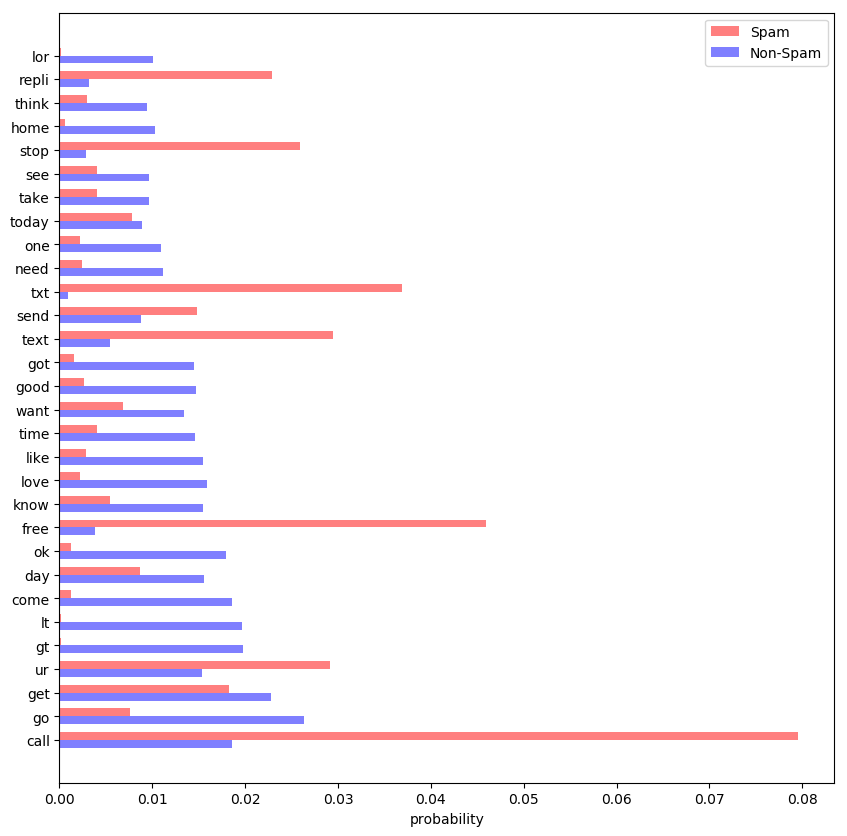

In [72]:
mnb = MultinomialNB()
mnb.fit(X, y)
feature_count_temp = mnb.feature_count_
probs = mnb.feature_log_prob_
row, col = feature_count_temp.shape


# feature들의 갯수 구하기
feature_count = []
for i in range(col):
    temp = feature_count_temp[0][i] + feature_count_temp[1][i]
    feature_count.append(int(temp))

# 정렬해서 큰거 30개 뽑아내기
temp_feature_idx = np.argsort(feature_count)
feature_idx = temp_feature_idx[-30:]

# 상위 30개의 단어 리스트 생성,  확률 리스트 생성
non_spam_prob_temp, spam_prob_temp = probs
non_spam_prob = []
spam_prob = []
y_tick_label = []
for i in range(30):
    y_tick_label.append(word[feature_idx[i]])
    non_spam_prob.append(np.exp(non_spam_prob_temp[feature_idx[i]]))
    spam_prob.append(np.exp(spam_prob_temp[feature_idx[i]]))

#그래프 그리기
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (10, 10))

y_pos = np.arange(0, 180, 6)
ax.barh(y_pos-1, spam_prob, 2, align='center', color='red', alpha=0.5)
ax.barh(y_pos+1, non_spam_prob, 2, align='center', color='blue', alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(y_tick_label)
ax.invert_yaxis() 
ax.set_xlabel('probability')
ax.legend(("Spam", "Non-Spam"))
plt.show()




(5) Bernoulli naïve Bayes 모형을 이용해서 세팅 변경 없이 train set으로 학습을 하고 test set을 이용해서 정확도(accuracy), recall, precision, f1 measure 값을 구하시오. (2)의 결과와 비교하여 어느 쪽이 더 나은 모형인지 설명하시오. 이 결과로부터 알 수 있는 사실은 무엇인가? 

In [73]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

test_score = metrics.accuracy_score(y_test, y_pred)

recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
f1_measure = metrics.f1_score(y_test, y_pred)

print("정확도: {}".format(test_score))
print("recall: {}\nprecision: {}\nf1_measure: {}".format(recall, precision, f1_measure))

정확도: 0.9726027397260274
recall: 0.8513513513513513
precision: 0.9545454545454546
f1_measure: 0.9
